In [16]:
from torchvision import models, transforms
from PIL import Image
import torch

In [7]:
# dir(models)

In [8]:
resnet = models.resnet101(weights=True)

In [10]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [12]:
img = Image.open("../resources/images/dog-8510901_640.jpg")

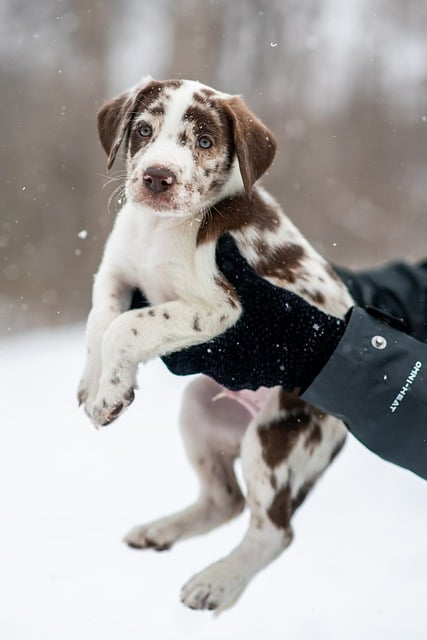

In [13]:
img

In [14]:
img_transformed = preprocess(img)

In [17]:
batch_t = torch.unsqueeze(img_transformed, 0)

In [18]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
output = resnet(batch_t)

In [23]:
output.shape

torch.Size([1, 1000])

In [26]:
_, index = torch.max(out, 1)

In [30]:
with open('../resources/data/imagenet-classes.txt', 'r') as f:
    labels = [line.strip() for line in f.readlines()]

In [31]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

In [33]:
labels[index[0]], percentage[index[0]].item()

('German short-haired pointer', 82.81477355957031)

In [34]:
_, indices = torch.sort(output, descending=True)

In [36]:
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('German short-haired pointer', 82.81477355957031),
 ('Brittany spaniel', 12.86005973815918),
 ('English foxhound', 1.1233973503112793),
 ('English springer, English springer spaniel', 0.7881611585617065),
 ('dalmatian, coach dog, carriage dog', 0.7584009170532227)]